### Beginning of Deep Learning
#### Perceptron XOR Problem

In [1]:
import numpy as np 

In [4]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

#### 모델 생성 

In [5]:
import tensorflow as tf

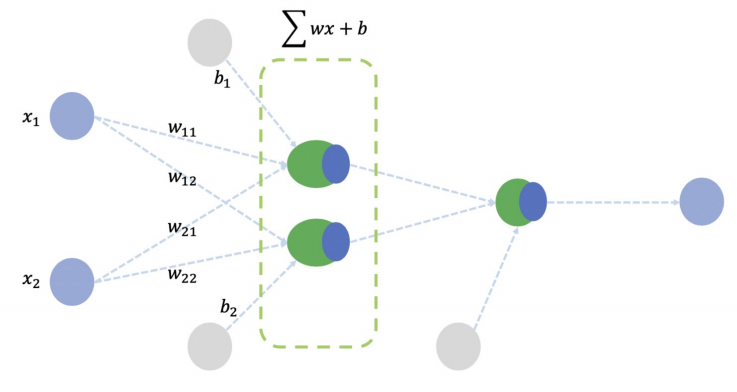

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)), # 입력 데이터 2개 , 출력 데이터 2개 
    tf.keras.layers.Dense(1, activation='sigmoid') # input_shape=(2,) 생략 ->  앞의 레이어 층의 출력 데이터 형태와 동일 
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

In [12]:
hist = model.fit(X, y, epochs=5000, # epochs : 지정한 횟수만큼 학습
                 batch_size=64) # batch_size : 한번에 학습하는 데이터의 수를 지정 

Epoch 1/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.2501
Epoch 2/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2501
Epoch 3/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2501
Epoch 4/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2501
Epoch 5/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2501
Epoch 6/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2501
Epoch 7/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2501
Epoch 8/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2501
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2501
Epoch 10/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2501
Epoch 11/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2501
Epoch 12/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2501
Epoch 13/5000
1/1 [=========================

In [13]:
model.predict(X)

1/1 [==============================] - 1s 821ms/step


array([[0.5061449 ],
       [0.5098117 ],
       [0.4923373 ],
       [0.49370906]], dtype=float32)

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

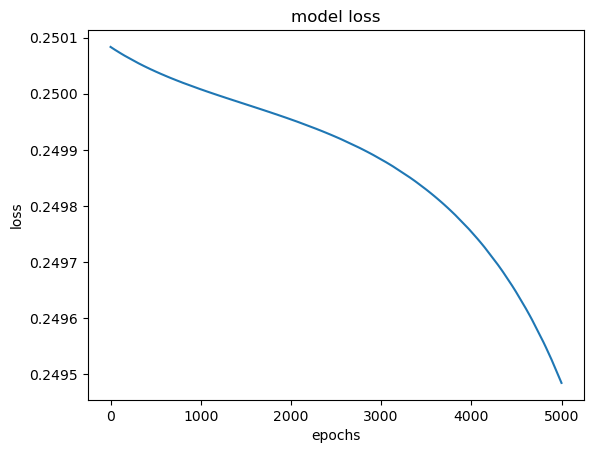

In [17]:
plt.plot(hist.history['loss']);
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#### layer weight

In [19]:
for w in model.weights:
    print('-----------------------------------------------------')
    print(w)

-----------------------------------------------------
<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.5681873 ,  0.15005584],
       [-1.0679677 , -0.09263796]], dtype=float32)>
-----------------------------------------------------
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-0.20212276, -0.06565933], dtype=float32)>
-----------------------------------------------------
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.32156917],
       [-0.8168358 ]], dtype=float32)>
-----------------------------------------------------
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.27500492], dtype=float32)>
